In [28]:
from sklearn.metrics import classification_report
import pandas as pd
from scipy.stats import pearsonr
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Read data

In [29]:
df = pd.read_csv('data/Data_combination_test.csv')
df

,StartDate,RecordedDate,IPAddress,Finished,Coder,ID,Mark_ID,Genre,topiccode,Platform,...,Rationality_dummy_ZeroS,Ideology_dummy_ZeroS,Interactivity_dummy_ZeroS,FK_SCORE_DUMMY,Integrative_Complexity_dummy,Conservative_dummy_ZeroS,Liberal_dummy_ZeroS,EMFD_Conservative_dummy,EMFD_Liberal_dummy,Dict_Civility_Ksiazek_2015(reverse)
0,10/11/2021 10:34:05,10/11/2021 10:36:46,213.127.109.191,1,6,Ugx2WXq9UdV8mPPjejJ4AaABAg.8yHCKV0Boe58yYRxEQEF45,282,1,2,1,...,NaN,NaN,NaN,0,0,NaN,NaN,0,1,0
1,6/6/2021 16:12:46,6/6/2021 16:16:16,213.127.76.145,1,6,UgwUPFScjJ0MCeaP2F54AaABAg.8lvp3fc9Euf8lvvgsUgEgV,769,0,0,1,...,NaN,NaN,NaN,0,0,NaN,NaN,0,1,0
2,6/4/2021 11:48:09,6/4/2021 11:50:46,213.127.77.64,1,6,UgwRZv_F4VDm_-Z-f6l4AaABAg,1435,0,0,1,...,NaN,NaN,NaN,0,0,NaN,NaN,0,0,1
3,6/18/2021 17:42:00,6/18/2021 17:45:04,213.127.126.118,1,6,UgyCwfMxdJiV_HEQR754AaABAg,2366,0,0,1,...,NaN,NaN,NaN,0,1,NaN,NaN,0,1,0
4,6/5/2021 11:36:38,6/5/2021 11:38:50,213.127.76.145,1,6,UgxjeqM4xT2JgZHv4Mh4AaABAg,3643,0,0,1,...,NaN,NaN,NaN,0,0,NaN,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,12/31/2021 14:26:41,12/31/2021 14:28:06,193.154.174.158,1,6,Ugwu_8FyrPOPsiUFOwJ4AaABAg.8v37B9a3NuP8vXbaTvXU6l,2002560,1,3,1,...,NaN,NaN,NaN,0,1,NaN,NaN,1,0,0
769,12/31/2021 14:54:26,12/31/2021 14:55:37,193.154.174.158,1,6,UgzAKozZbWD42SwHjpN4AaABAg.8f-pKP_hEMZ8f1GHmo0Swp,2002565,1,1,1,...,0.0,0.0,1.0,0,1,0.0,1.0,1,0,0
770,12/31/2021 14:58:41,12/31/2021 14:59:42,193.154.174.158,1,6,UgzM7j1HgzgvgtjeWVN4AaABAg.8hTpR_HFok08hUod9kdzkz,2002568,0,2,1,...,NaN,NaN,NaN,0,0,NaN,NaN,0,0,1
771,12/31/2021 15:06:32,12/31/2021 15:07:40,193.154.174.158,1,6,UgzYBOtnvf4HdbtbDol4AaABAg.8wRfggpcK3y8wZrYsJVJtQ,2002574,2,3,1,...,1.0,0.0,1.0,0,0,0.0,1.0,1,0,0


In [30]:
test_variables = ['INTERACTIVITY_DUMMY','INCIVILITY_DUMMY','HATELIST_FOCUSED_DUMMY',
                 'RATIONALITY_DUMMY','HAS_OPINION_DUMMY','LIBERAL_DUMMY','CONSERVATIVE_DUMMY']

## Precision, Recall, and F1 score

set variables for PRF1 analysis

In [31]:
dimensions = pd.DataFrame([['Incivility',
               ['INCIVILITY_DUMMY','HATELIST_FOCUSED_DUMMY'],
               ['Dict_Hostility_Ksiazek_2015','Dict_Civility_Ksiazek_2015(reverse)','Dict_GoogeProject_OffensiveWords','Dict_Incivility_Muddiman','Dict_Swearwords_LIWC','Dict_HatebaseVocabEN',
                             'Civility_dummy_ZeroS','INCIVILITY_DUMMY_ML','HATELIST_FOCUSED_DUMMY_ML','INCIVILITY_DUMMY_FT','HATELIST_FOCUSED_DUMMY_FT'
               ]],
                           
              ['Diversity',
               ['HAS_OPINION_DUMMY','LIBERAL_DUMMY','CONSERVATIVE_DUMMY'],
               ['MFD1_conservative', 'MFD1_liberal','MFD2_conservative', 'MFD2_liberal', 'EMFD_Liberal_dummy','EMFD_Conservative_dummy',
                           'Conservative_dummy_ZeroS','Liberal_dummy_ZeroS','HAS_OPINION_DUMMY_ML','LIBERAL_DUMMY_ML','CONSERVATIVE_DUMMY_ML','HAS_OPINION_DUMMY_FT','LIBERAL_DUMMY_FT','CONSERVATIVE_DUMMY_FT'
               ]],
                           
              ['Rationality',
               ['RATIONALITY_DUMMY'],    
               ['FK_SCORE_DUMMY','Integrative_Complexity_dummy','formality_dummy','Rationality_dummy_ZeroS','RATIONALITY_DUMMY_ML', 'RATIONALITY_DUMMY_FT'
               ]],
                           
              ['Interactivity',
               ['INTERACTIVITY_DUMMY'],
               ['Interactivity_dummy_ZeroS','mentioned','INTERACTIVITY_DUMMY_ML','INTERACTIVITY_DUMMY_FT'
               ]]],
                          
            columns = ['dimension','labels','measures'])
dimensions

,dimension,labels,measures
0,Incivility,"[INCIVILITY_DUMMY, HATELIST_FOCUSED_DUMMY]","[Dict_Hostility_Ksiazek_2015, Dict_Civility_Ks..."
1,Diversity,"[HAS_OPINION_DUMMY, LIBERAL_DUMMY, CONSERVATIV...","[MFD1_conservative, MFD1_liberal, MFD2_conserv..."
2,Rationality,[RATIONALITY_DUMMY],"[FK_SCORE_DUMMY, Integrative_Complexity_dummy,..."
3,Interactivity,[INTERACTIVITY_DUMMY],"[Interactivity_dummy_ZeroS, mentioned, INTERAC..."


In [32]:
import pandas as pd
from sklearn.metrics import classification_report

# Reinitialize the DataFrame
performance = pd.DataFrame(columns=['Dimension', 'Label', 'Measures', 'Class', 'Precision', 'Recall', 'F1-score', 'support', 'Accuracy_overall'])

classif = ['0', '1', 'macro avg', 'weighted avg']

for index, dim in dimensions.iterrows():
    for label in dim['labels']:
        for measure in dim['measures']:
            try:
                data = df[df[measure].notna()]
                classfication = classification_report(data[label], data[measure], output_dict=True)
                for c in classif:
                    row = {
                        'Dimension': dim['dimension'],
                        'Label': label,
                        'Measures': measure,
                        'Class': c,
                        'Precision': classfication[c]['precision'],
                        'Recall': classfication[c]['recall'],
                        'F1-score': classfication[c]['f1-score'],
                        'support': classfication[c]['support'],
                        'Accuracy_overall': classfication['accuracy']
                    }
                    performance = pd.concat([performance, pd.DataFrame([row])], ignore_index=True)
            except IndexError:
                pass


In [33]:
performance

,Dimension,Label,Measures,Class,Precision,Recall,F1-score,support,Accuracy_overall
0,Incivility,INCIVILITY_DUMMY,Dict_Hostility_Ksiazek_2015,0,0.651852,0.862745,0.742616,408.0,0.684347
1,Incivility,INCIVILITY_DUMMY,Dict_Hostility_Ksiazek_2015,1,0.759657,0.484932,0.591973,365.0,0.684347
2,Incivility,INCIVILITY_DUMMY,Dict_Hostility_Ksiazek_2015,macro avg,0.705754,0.673838,0.667295,773.0,0.684347
3,Incivility,INCIVILITY_DUMMY,Dict_Hostility_Ksiazek_2015,weighted avg,0.702756,0.684347,0.671485,773.0,0.684347
4,Incivility,INCIVILITY_DUMMY,Dict_Civility_Ksiazek_2015(reverse),0,0.502970,0.622549,0.556407,408.0,0.476067
...,...,...,...,...,...,...,...,...,...
291,Interactivity,INTERACTIVITY_DUMMY,INTERACTIVITY_DUMMY_ML,weighted avg,0.755111,0.636481,0.654894,773.0,0.636481
292,Interactivity,INTERACTIVITY_DUMMY,INTERACTIVITY_DUMMY_FT,0,0.871747,0.838998,0.855059,559.0,0.794308
293,Interactivity,INTERACTIVITY_DUMMY,INTERACTIVITY_DUMMY_FT,1,0.617021,0.677570,0.645880,214.0,0.794308
294,Interactivity,INTERACTIVITY_DUMMY,INTERACTIVITY_DUMMY_FT,macro avg,0.744384,0.758284,0.750469,773.0,0.794308


In [34]:
performance.to_csv('outputs/evaluation/PRF1_test.csv',index=False)

## Correlation

set variables for correlation analysis

In [35]:
rename = {'INCIVILITY_DUMMY':'Incivility (manual)',
          'HATELIST_FOCUSED_DUMMY':'Hate speech (manual)',
          'Dict_Hostility_Ksiazek_2015':'Ksiazek hostility',
          'Dict_Civility_Ksiazek_2015':'Ksiazek civility (reverse)',
          'Dict_GoogeProject_OffensiveWords':'Google WDYL',
          'Dict_Incivility_Muddiman':'Muddiman’s incivility',
          'Dict_Swearwords_LIWC':'LIWC swearword list',
          'Dict_HatebaseVocabEN':'Hatebase wordlist',
          'Civility_dummy_ZeroS':'Zero-shot: Civility',
          'INCIVILITY_DUMMY_ML':'Incivility (ML)',
          'HATELIST_FOCUSED_DUMMY_ML':'Hate speech (ML)',
          'INCIVILITY_DUMMY_FT':'Incivility (FT)',
          'HATELIST_FOCUSED_DUMMY_FT':'Hate speech (FT)',
          
          'HAS_OPINION_DUMMY':'Has opinion (manual)',
          'LIBERAL_DUMMY':'Liberal (manual)',
          'CONSERVATIVE_DUMMY':'Conservative (manual)',
          'Ideology_dummy_ZeroS':'Zero-shot: Ideology',
          'MFD1_liberal_ratio':'MFD1: Liberal (ratio)',
          'MFD1_conservative_ratio':'MFD1: Conservative (ratio)',
          'MFD2_liberal_ratio':'MFD2: Liberal (ratio)',
          'MFD2_conservative_ratio':'MFD2: Conservative (ratio)',
          'HAS_OPINION_DUMMY_ML':'Has opinion (ML)',
          'LIBERAL_DUMMY_ML':'Liberal (ML)',
          'CONSERVATIVE_DUMMY_ML':'Conservative (ML)',

          'HAS_OPINION_DUMMY_FT':'Has opinion (FT)',
          'LIBERAL_DUMMY_FT':'Liberal (FT)',
          'CONSERVATIVE_DUMMY_FT':'Conservative (FT)',
          
          'Liberal_foundation_likelihood':'eMFD: Liberal (ratio)',
          'Conservative_foundation_likelihood':'eMFD: Conservative (ratio)',
          
          'RATIONALITY_DUMMY':'Rationality (manual)',
          'FK_SCORE':'Flesch-Kincaid score',
          'formality': 'Formality',
          'Rationality_dummy_ZeroS':'Zero-shot: Rationality',
          'RATIONALITY_DUMMY_ML':'Rationality (ML)',
          'RATIONALITY_DUMMY_FT':'Rationality (FT)',
          
          'IC_score_per':'Intergrative Complexity',
          
          'INTERACTIVITY_DUMMY':'Interactivity (manual)',
          'Interactivity_dummy_ZeroS':'Zero-shot: Interactivity',
          'mentioned':'@ mentioned',
          'INTERACTIVITY_DUMMY_ML':'Interactivity (ML)',
          'INTERACTIVITY_DUMMY_FT':'Interactivity (FT)'
         }

df = df.rename(columns=rename)

In [36]:
df

,StartDate,RecordedDate,IPAddress,Finished,Coder,ID,Mark_ID,Genre,topiccode,Platform,...,Zero-shot: Rationality,Zero-shot: Ideology,Zero-shot: Interactivity,FK_SCORE_DUMMY,Integrative_Complexity_dummy,Conservative_dummy_ZeroS,Liberal_dummy_ZeroS,EMFD_Conservative_dummy,EMFD_Liberal_dummy,Dict_Civility_Ksiazek_2015(reverse)
0,10/11/2021 10:34:05,10/11/2021 10:36:46,213.127.109.191,1,6,Ugx2WXq9UdV8mPPjejJ4AaABAg.8yHCKV0Boe58yYRxEQEF45,282,1,2,1,...,NaN,NaN,NaN,0,0,NaN,NaN,0,1,0
1,6/6/2021 16:12:46,6/6/2021 16:16:16,213.127.76.145,1,6,UgwUPFScjJ0MCeaP2F54AaABAg.8lvp3fc9Euf8lvvgsUgEgV,769,0,0,1,...,NaN,NaN,NaN,0,0,NaN,NaN,0,1,0
2,6/4/2021 11:48:09,6/4/2021 11:50:46,213.127.77.64,1,6,UgwRZv_F4VDm_-Z-f6l4AaABAg,1435,0,0,1,...,NaN,NaN,NaN,0,0,NaN,NaN,0,0,1
3,6/18/2021 17:42:00,6/18/2021 17:45:04,213.127.126.118,1,6,UgyCwfMxdJiV_HEQR754AaABAg,2366,0,0,1,...,NaN,NaN,NaN,0,1,NaN,NaN,0,1,0
4,6/5/2021 11:36:38,6/5/2021 11:38:50,213.127.76.145,1,6,UgxjeqM4xT2JgZHv4Mh4AaABAg,3643,0,0,1,...,NaN,NaN,NaN,0,0,NaN,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,12/31/2021 14:26:41,12/31/2021 14:28:06,193.154.174.158,1,6,Ugwu_8FyrPOPsiUFOwJ4AaABAg.8v37B9a3NuP8vXbaTvXU6l,2002560,1,3,1,...,NaN,NaN,NaN,0,1,NaN,NaN,1,0,0
769,12/31/2021 14:54:26,12/31/2021 14:55:37,193.154.174.158,1,6,UgzAKozZbWD42SwHjpN4AaABAg.8f-pKP_hEMZ8f1GHmo0Swp,2002565,1,1,1,...,0.0,0.0,1.0,0,1,0.0,1.0,1,0,0
770,12/31/2021 14:58:41,12/31/2021 14:59:42,193.154.174.158,1,6,UgzM7j1HgzgvgtjeWVN4AaABAg.8hTpR_HFok08hUod9kdzkz,2002568,0,2,1,...,NaN,NaN,NaN,0,0,NaN,NaN,0,0,1
771,12/31/2021 15:06:32,12/31/2021 15:07:40,193.154.174.158,1,6,UgzYBOtnvf4HdbtbDol4AaABAg.8wRfggpcK3y8wZrYsJVJtQ,2002574,2,3,1,...,1.0,0.0,1.0,0,0,0.0,1.0,1,0,0


In [37]:
# after rename
dimensions = [['Incivility',['Incivility (manual)', 'Hate speech (manual)',#'Vulgar','Incivility','Namecalling',
                             'Ksiazek hostility','Google WDYL','Ksiazek civility (reverse)',
                             'Muddiman’s incivility','LIWC swearword list','Hatebase wordlist',
                             'Incivility (ML)', 'Hate speech (ML)',  'Incivility (FT)', 'Hate speech (FT)'
                            ]],
              
              ['Diversity',['Has opinion (manual)','Liberal (manual)','Conservative (manual)',
                        'MFD1: Liberal (ratio)','MFD1: Conservative (ratio)','MFD2: Liberal (ratio)','MFD2: Conservative (ratio)', 
                        'eMFD: Liberal (ratio)','eMFD: Conservative (ratio)',
                        'Has opinion (ML)','Liberal (ML)', 'Conservative (ML)', 'Has opinion (FT)', 'Liberal (FT)','Conservative (FT)']],
              
              
              ['Rationality',['Rationality (manual)',
                          'Formality','Flesch-Kincaid score','Intergrative Complexity',
                          'Rationality (ML)', 'Rationality (FT)']],
              
              ['Interactivity',['Interactivity (manual)',
                            '@ mentioned',
                            'Interactivity (ML)', 'Interactivity (FT)']]
              ]


,Incivility (manual),Hate speech (manual),Ksiazek hostility,Google WDYL,Ksiazek civility (reverse),Muddiman’s incivility,LIWC swearword list,Hatebase wordlist,Incivility (ML),Hate speech (ML),Incivility (FT),Hate speech (FT)
Incivility (manual),0.000000e+00,9.306824e-60,1.064772e-27,5.524027e-13,0.057644,5.360741e-11,1.847028e-18,9.786501e-05,1.785758e-22,1.723639e-08,1.174784e-40,4.886035e-34
Hate speech (manual),9.306824e-60,0.000000e+00,3.327346e-23,7.523530e-28,0.303090,1.513835e-05,1.465316e-34,3.987710e-11,1.487146e-12,3.279932e-16,8.402013e-27,3.271741e-54
Ksiazek hostility,1.064772e-27,3.327346e-23,0.000000e+00,4.655157e-26,0.000322,9.043926e-14,3.629082e-34,3.808206e-07,1.434552e-15,1.228288e-08,1.508976e-38,1.020063e-40
Google WDYL,5.524027e-13,7.523530e-28,4.655157e-26,0.000000e+00,0.872193,6.838026e-01,4.773429e-91,2.746722e-05,4.391076e-07,4.388950e-08,1.889030e-10,4.647997e-26
Ksiazek civility (reverse),5.764403e-02,3.030900e-01,3.224922e-04,8.721926e-01,0.000000,5.343032e-01,4.319500e-01,8.258795e-01,7.130736e-02,1.127891e-01,1.840399e-01,5.021006e-01
Muddiman’s incivility,5.360741e-11,1.513835e-05,9.043926e-14,6.838026e-01,0.534303,0.000000e+00,2.881167e-03,8.703008e-06,2.940557e-06,9.984658e-03,7.821313e-09,4.105722e-08
LIWC swearword list,1.847028e-18,1.465316e-34,3.629082e-34,4.773429e-91,0.431950,2.881167e-03,0.000000e+00,2.079003e-11,1.356816e-12,1.443540e-17,2.006831e-17,2.351183e-46
Hatebase wordlist,9.786501e-05,3.987710e-11,3.808206e-07,2.746722e-05,0.825880,8.703008e-06,2.079003e-11,0.000000e+00,1.650164e-05,5.130664e-04,3.695476e-06,3.657342e-10
Incivility (ML),1.785758e-22,1.487146e-12,1.434552e-15,4.391076e-07,0.071307,2.940557e-06,1.356816e-12,1.650164e-05,0.000000e+00,2.645270e-27,1.142094e-32,1.544643e-15
Hate speech (ML),1.723639e-08,3.279932e-16,1.228288e-08,4.388950e-08,0.112789,9.984658e-03,1.443540e-17,5.130664e-04,2.645270e-27,0.000000e+00,1.595577e-18,5.639663e-16


,Incivility (manual),Hate speech (manual),Ksiazek hostility,Google WDYL,Ksiazek civility (reverse),Muddiman’s incivility,LIWC swearword list,Hatebase wordlist,Incivility (ML),Hate speech (ML),Incivility (FT),Hate speech (FT)
Incivility (manual),1.0***,0.54***,0.38***,0.26***,0.07,0.23***,0.31***,0.14***,0.34***,0.2***,0.45***,0.42***
Hate speech (manual),0.54***,1.0***,0.35***,0.38***,-0.04,0.15***,0.42***,0.23***,0.25***,0.29***,0.37***,0.52***
Ksiazek hostility,0.38***,0.35***,1.0***,0.37***,0.13***,0.26***,0.42***,0.18***,0.28***,0.2***,0.44***,0.45***
Google WDYL,0.26***,0.38***,0.37***,1.0***,0.01,0.01,0.64***,0.15***,0.18***,0.2***,0.23***,0.37***
Ksiazek civility (reverse),0.07,-0.04,0.13***,0.01,1.0***,0.02,-0.03,0.01,0.06,0.06,0.05,-0.02
Muddiman’s incivility,0.23***,0.15***,0.26***,0.01,0.02,1.0***,0.11**,0.16***,0.17***,0.09**,0.21***,0.2***
LIWC swearword list,0.31***,0.42***,0.42***,0.64***,-0.03,0.11**,1.0***,0.24***,0.25***,0.3***,0.3***,0.48***
Hatebase wordlist,0.14***,0.23***,0.18***,0.15***,0.01,0.16***,0.24***,1.0***,0.15***,0.12***,0.17***,0.22***
Incivility (ML),0.34***,0.25***,0.28***,0.18***,0.06,0.17***,0.25***,0.15***,1.0***,0.38***,0.41***,0.28***
Hate speech (ML),0.2***,0.29***,0.2***,0.2***,0.06,0.09**,0.3***,0.12***,0.38***,1.0***,0.31***,0.29***


,Has opinion (manual),Liberal (manual),Conservative (manual),MFD1: Liberal (ratio),MFD1: Conservative (ratio),MFD2: Liberal (ratio),MFD2: Conservative (ratio),eMFD: Liberal (ratio),eMFD: Conservative (ratio),Has opinion (ML),Liberal (ML),Conservative (ML),Has opinion (FT),Liberal (FT),Conservative (FT)
Has opinion (manual),0.000000e+00,7.898778e-48,2.926903e-36,5.105431e-01,1.041005e-01,4.529412e-01,5.215528e-02,4.057438e-01,4.916272e-01,6.597487e-42,3.253674e-15,4.880527e-18,3.465730e-12,2.188244e-40,1.663782e-23
Liberal (manual),7.898778e-48,0.000000e+00,4.932295e-08,3.545965e-01,3.323501e-01,7.698927e-01,3.438191e-01,8.310167e-01,2.596800e-01,2.149870e-14,1.304452e-16,1.029807e-02,7.119411e-05,6.758500e-16,1.419515e-06
Conservative (manual),2.926903e-36,4.932295e-08,0.000000e+00,2.485474e-01,8.262915e-01,3.807792e-01,2.391830e-01,1.552610e-01,1.363426e-01,7.857165e-09,2.559857e-01,6.164795e-09,2.132823e-02,5.380341e-06,1.799472e-10
MFD1: Liberal (ratio),5.105431e-01,3.545965e-01,2.485474e-01,0.000000e+00,6.180041e-01,1.403311e-46,5.534887e-01,1.201235e-03,2.956468e-01,1.821050e-01,8.493983e-01,6.192160e-01,1.702991e-01,7.608136e-01,5.398343e-01
MFD1: Conservative (ratio),1.041005e-01,3.323501e-01,8.262915e-01,6.180041e-01,0.000000e+00,1.877907e-01,1.220098e-11,8.954440e-01,9.880081e-03,3.793964e-01,3.773485e-02,5.822446e-01,3.796213e-02,7.980054e-02,4.737162e-01
MFD2: Liberal (ratio),4.529412e-01,7.698927e-01,3.807792e-01,1.403311e-46,1.877907e-01,0.000000e+00,9.149658e-02,2.910381e-15,7.932550e-03,2.868699e-01,8.797795e-01,1.319549e-01,3.330411e-02,2.499755e-01,4.557737e-01
MFD2: Conservative (ratio),5.215528e-02,3.438191e-01,2.391830e-01,5.534887e-01,1.220098e-11,9.149658e-02,0.000000e+00,1.624468e-01,1.503093e-02,3.868635e-01,8.872163e-01,5.096102e-02,5.785151e-01,4.345769e-01,1.460363e-01
eMFD: Liberal (ratio),4.057438e-01,8.310167e-01,1.552610e-01,1.201235e-03,8.954440e-01,2.910381e-15,1.624468e-01,0.000000e+00,2.998098e-17,3.676610e-01,2.421047e-01,8.319098e-01,2.941985e-03,6.894814e-01,3.345520e-02
eMFD: Conservative (ratio),4.916272e-01,2.596800e-01,1.363426e-01,2.956468e-01,9.880081e-03,7.932550e-03,1.503093e-02,2.998098e-17,0.000000e+00,1.343688e-01,9.169207e-02,3.764501e-01,4.023748e-02,6.168558e-01,3.865873e-01
Has opinion (ML),6.597487e-42,2.149870e-14,7.857165e-09,1.821050e-01,3.793964e-01,2.868699e-01,3.868635e-01,3.676610e-01,1.343688e-01,0.000000e+00,1.043914e-37,4.420317e-29,2.294510e-20,2.472302e-61,4.062829e-18


,Has opinion (manual),Liberal (manual),Conservative (manual),MFD1: Liberal (ratio),MFD1: Conservative (ratio),MFD2: Liberal (ratio),MFD2: Conservative (ratio),eMFD: Liberal (ratio),eMFD: Conservative (ratio),Has opinion (ML),Liberal (ML),Conservative (ML),Has opinion (FT),Liberal (FT),Conservative (FT)
Has opinion (manual),1.0***,0.49***,0.43***,-0.02,0.06,-0.03,0.07,0.03,0.02,0.46***,0.28***,0.3***,0.25***,0.45***,0.35***
Liberal (manual),0.49***,1.0***,-0.19***,-0.03,0.03,-0.01,0.03,-0.01,0.04,0.27***,0.29***,0.09*,0.14***,0.28***,0.17***
Conservative (manual),0.43***,-0.19***,1.0***,-0.04,0.01,-0.03,0.04,0.05,-0.05,0.21***,0.04,0.21***,0.08*,0.16***,0.23***
MFD1: Liberal (ratio),-0.02,-0.03,-0.04,1.0***,-0.02,0.48***,0.02,0.12**,-0.04,0.05,0.01,-0.02,0.05,0.01,0.02
MFD1: Conservative (ratio),0.06,0.03,0.01,-0.02,1.0***,-0.05,0.24***,0.0,0.09**,0.03,0.07*,-0.02,0.07*,0.06,0.03
MFD2: Liberal (ratio),-0.03,-0.01,-0.03,0.48***,-0.05,1.0***,-0.06,0.28***,-0.1**,-0.04,0.01,-0.05,-0.08*,-0.04,0.03
MFD2: Conservative (ratio),0.07,0.03,0.04,0.02,0.24***,-0.06,1.0***,-0.05,0.09*,0.03,-0.01,0.07,-0.02,0.03,0.05
eMFD: Liberal (ratio),0.03,-0.01,0.05,0.12**,0.0,0.28***,-0.05,1.0***,-0.3***,0.03,0.04,0.01,0.11**,0.01,0.08*
eMFD: Conservative (ratio),0.02,0.04,-0.05,-0.04,0.09**,-0.1**,0.09*,-0.3***,1.0***,0.05,0.06,0.03,0.07*,0.02,0.03
Has opinion (ML),0.46***,0.27***,0.21***,0.05,0.03,-0.04,0.03,0.03,0.05,1.0***,0.44***,0.39***,0.32***,0.55***,0.31***


,Rationality (manual),Formality,Flesch-Kincaid score,Intergrative Complexity,Rationality (ML),Rationality (FT)
Rationality (manual),0.000000e+00,2.865519e-02,2.554574e-01,0.455893,1.597973e-26,4.604454e-38
Formality,2.865519e-02,0.000000e+00,5.252418e-11,0.639953,1.036286e-04,4.553707e-03
Flesch-Kincaid score,2.554574e-01,5.252418e-11,0.000000e+00,0.000005,9.835696e-02,4.714953e-03
Intergrative Complexity,4.558928e-01,6.399526e-01,4.909710e-06,0.000000,6.053153e-01,5.483164e-01
Rationality (ML),1.597973e-26,1.036286e-04,9.835696e-02,0.605315,0.000000e+00,2.068832e-76
Rationality (FT),4.604454e-38,4.553707e-03,4.714953e-03,0.548316,2.068832e-76,0.000000e+00


,Rationality (manual),Formality,Flesch-Kincaid score,Intergrative Complexity,Rationality (ML),Rationality (FT)
Rationality (manual),1.0***,-0.08*,0.04,-0.03,0.37***,0.44***
Formality,-0.08*,1.0***,0.23***,0.02,-0.14***,-0.1**
Flesch-Kincaid score,0.04,0.23***,1.0***,0.16***,0.06,0.1**
Intergrative Complexity,-0.03,0.02,0.16***,1.0***,0.02,0.02
Rationality (ML),0.37***,-0.14***,0.06,0.02,1.0***,0.6***
Rationality (FT),0.44***,-0.1**,0.1**,0.02,0.6***,1.0***


,Interactivity (manual),@ mentioned,Interactivity (ML),Interactivity (FT)
Interactivity (manual),0.000000e+00,0.000967,5.036724e-22,1.087896e-50
@ mentioned,9.665396e-04,0.000000,2.891586e-01,9.820849e-03
Interactivity (ML),5.036724e-22,0.289159,0.000000e+00,5.268311e-26
Interactivity (FT),1.087896e-50,0.009821,5.268311e-26,0.000000e+00


,Interactivity (manual),@ mentioned,Interactivity (ML),Interactivity (FT)
Interactivity (manual),1.0***,0.12***,0.34***,0.5***
@ mentioned,0.12***,1.0***,-0.04,0.09**
Interactivity (ML),0.34***,-0.04,1.0***,0.37***
Interactivity (FT),0.5***,0.09**,0.37***,1.0***


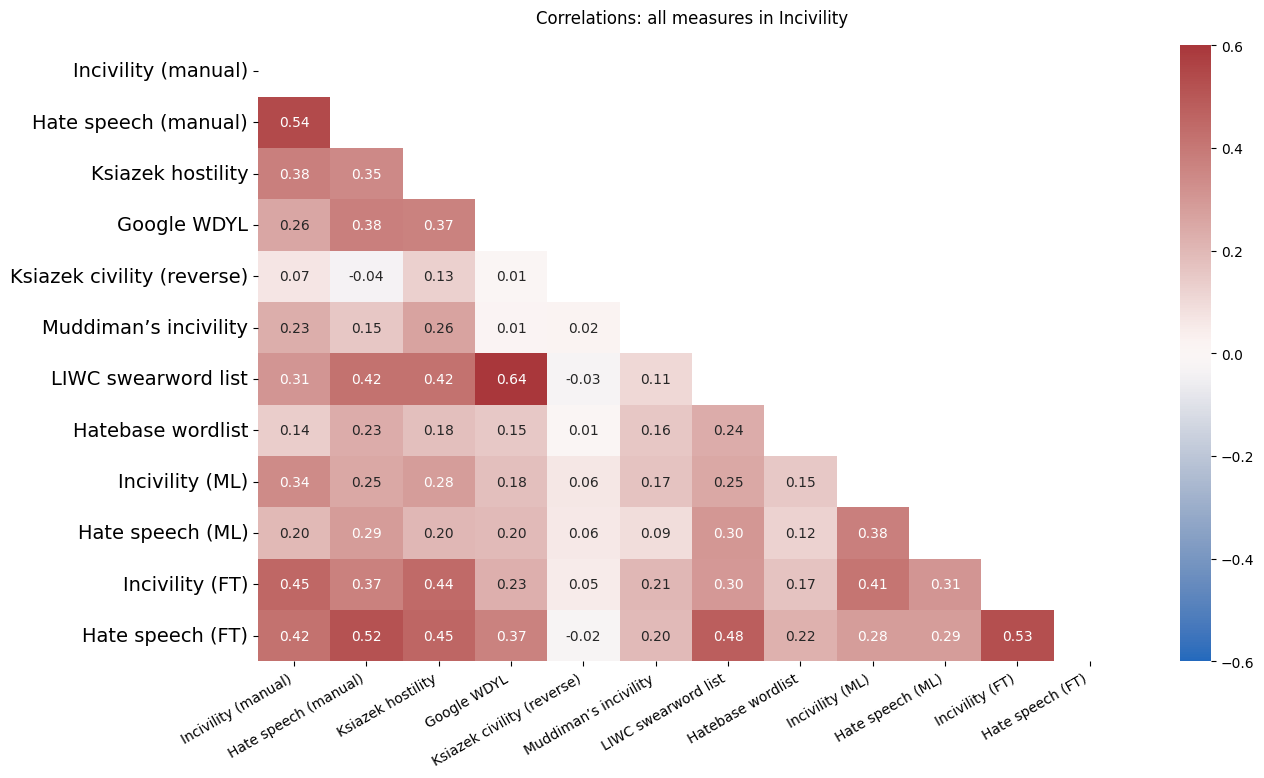

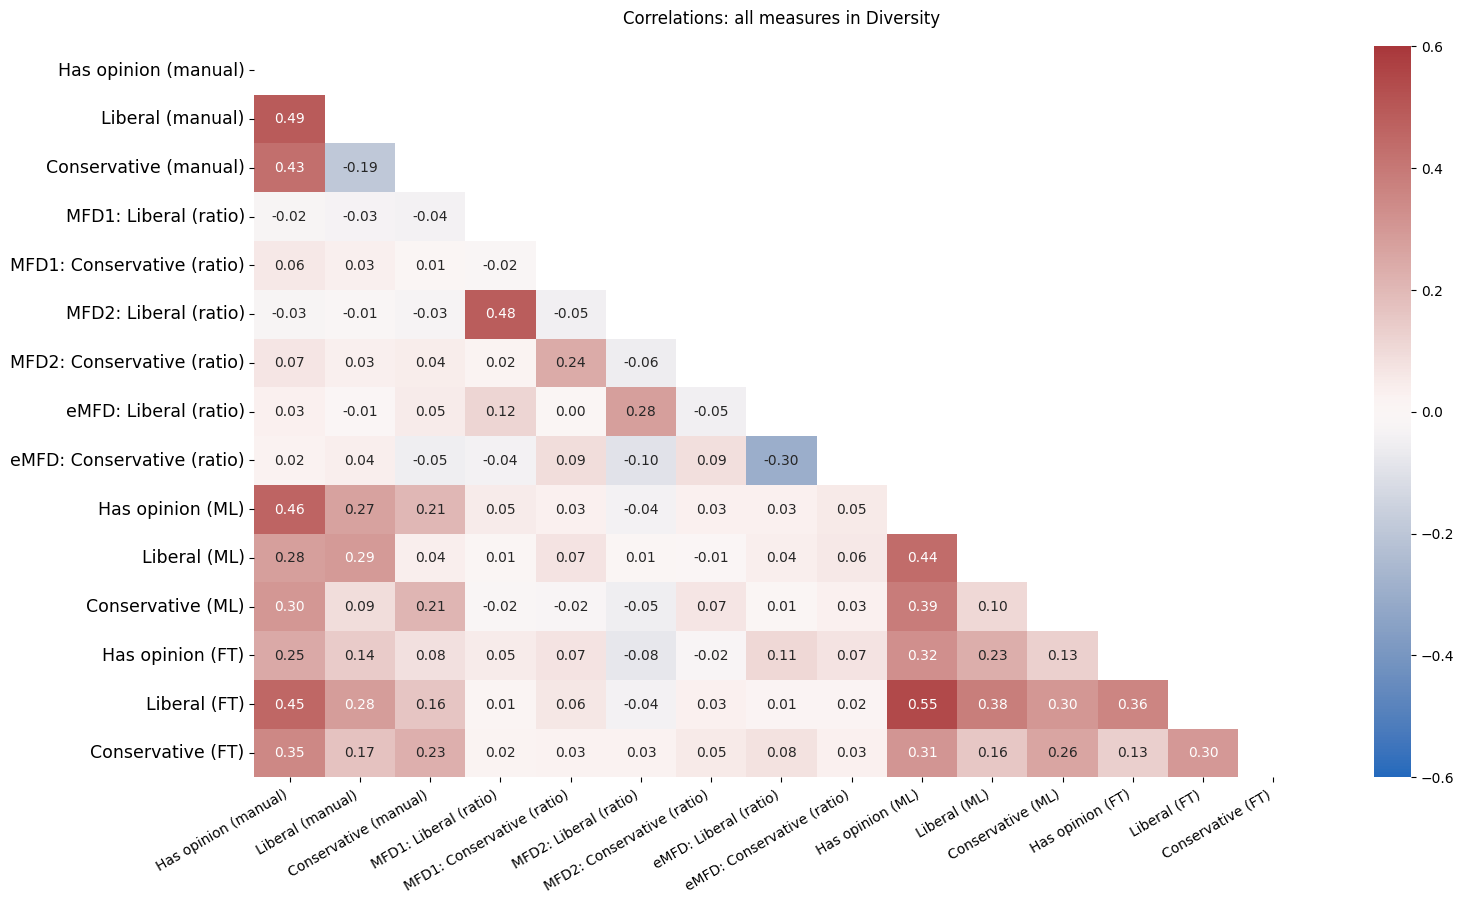

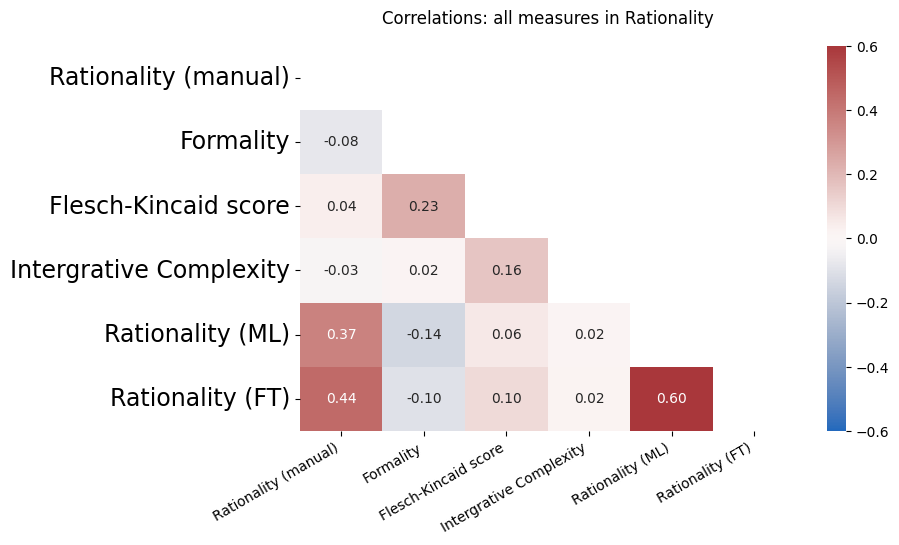

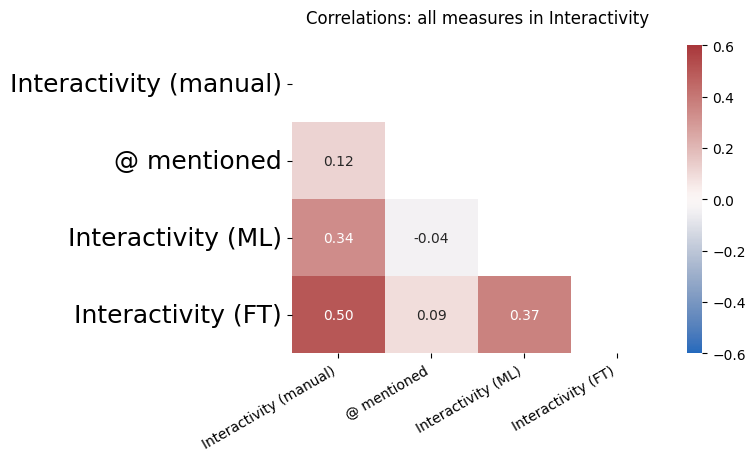

In [38]:
for dim, variables in dimensions:
    cor = df[variables]
    rho = cor.corr()
    pval = cor.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
    display(pval)
    p = pval.applymap(lambda x: ''.join(['*' for t in [0.001,0.01,0.05] if x<=t]))
    matrix = rho.round(2).astype(str) + p
    display(matrix)
    fig = plt.figure(figsize=(len(variables)+2,len(variables)/2+2))
    #define the mask to set the values in the upper triangle to True
    mask = np.triu(np.ones_like(rho, dtype=bool))
    heatmap = sns.heatmap(rho, mask=mask, vmin=-0.6, vmax=0.6, annot=True, cmap = 'vlag',fmt='.2f')
    heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation = 30, horizontalalignment='right')
    heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=20-len(variables)/2)
    name = 'Correlations: all measures in '+dim
    heatmap.set_title(name, pad=16)
    fig.savefig('outputs/plots/'+name+'.jpg',bbox_inches = 'tight',dpi=200)
    matrix.to_csv('outputs/evaluation/correlation.csv',mode='a',index=False)